In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [75]:
df = pd.read_csv(r'../../NTU_BigData_And_BusinessAnalyzation_Datasets/Orders.csv')

D:\python\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [76]:
df1 = df[['DateId', 'MemberId', 'SalesOrderSlaveTotalPayment']]

In [108]:
df2 = df1.groupby(by='MemberId')['SalesOrderSlaveTotalPayment'].mean().to_frame()

In [109]:
df3 = df1.groupby(by='MemberId')['SalesOrderSlaveTotalPayment'].size().to_frame()
df3 = df3.rename(columns={'SalesOrderSlaveTotalPayment':'Times'})

In [111]:
df4 = pd.merge(df2, df3, on='MemberId')

In [85]:
df5 = df4[df4['Times']<500]
df6 = df5[df4['SalesOrderSlaveTotalPayment']<1000]

D:\python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


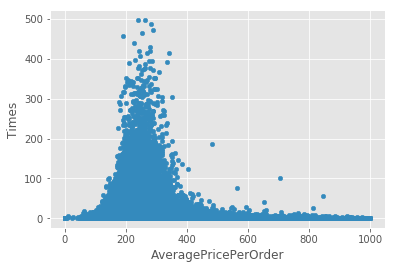

In [141]:
df6 = df6.rename(columns ={'SalesOrderSlaveTotalPayment':'AveragePricePerOrder'})
df6.plot.scatter(x='AveragePricePerOrder', y= 'Times')

In [142]:
df6.describe()

,AveragePricePerOrder,Times
count,563071.000000,563071.000000
mean,248.212731,9.724338
std,85.474823,14.498131
min,1.000000,1.000000
25%,196.750000,3.000000
50%,231.666667,5.000000
75%,280.695048,11.000000
max,998.000000,497.000000


In [143]:
df6.median()

AveragePricePerOrder    231.666667
Times                     5.000000
dtype: float64

In [149]:
f1 = 270
f11 = 170
f2 = 200
f22 = 100
df7 = df6[(df6['Times'] < f2 )& (df6['AveragePricePerOrder'] <f1) & (df6['Times'] >f22) & (df6['AveragePricePerOrder'] >f11)]
df7.median()

AveragePricePerOrder    233.603604
Times                   123.000000
dtype: float64

### Class 1: 低消新客
### Class 2: 新客(消費能力可期)
### Class 3: 低消熟客
### Class 4: 高消熟客

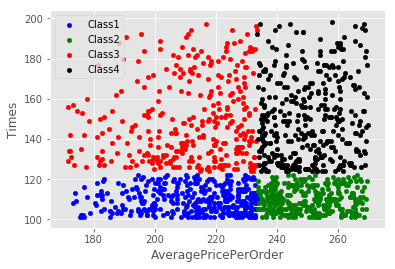

In [151]:
m1 = 233.603604
m2 = 123
df_1 = df7[(df7['Times']<m2) & (df7['AveragePricePerOrder']<m1)]
df_2 = df7[(df7['Times']<m2) & (df7['AveragePricePerOrder']>m1)]
df_3 = df7[(df7['Times']>m2) & (df7['AveragePricePerOrder']<m1)]
df_4 = df7[(df7['Times']>m2) & (df7['AveragePricePerOrder']>m1)]
ax = df_1.plot.scatter(x='AveragePricePerOrder',y='Times',color = 'Blue', label="Class1")
df_2.plot.scatter(x='AveragePricePerOrder',y='Times',color = 'Green', label="Class2",ax=ax)
df_3.plot.scatter(x='AveragePricePerOrder',y='Times',color = 'Red', label="Class3",ax=ax)
df_4.plot.scatter(x='AveragePricePerOrder',y='Times',color = 'Black', label="Class4",ax=ax)